# A better model for LHb neurons
## still based upon the Hindmarsh-Rose bursting model 

**Reference:**<br> Hindmarsh, J. L., & Rose, R. M.<br> A model of neuronal bursting using three coupled first
  order differential equations. Proceedings of the Royal society of London, Series B. Biological sciences **221**(1222): 87-102, 1984.


$\newcommand{\rmd}{\textrm{d}}$
$\newcommand{\eqdef}{:=}$
$\newcommand{\eps}{\varepsilon}$

We consider an extended version of the Hindmarsh-Rose bursting model, where we add a slow process on two parameters, one mimicking an applied current and the other one related to channel dynamics.
Parameter values are chosen so that the system is poised in the vicinity of a codimension-2 *saddle-node homoclinic (SNH)* bifurcation. Then, we propose phenomenological slow equations for these two parameters, which make them move slowly within that two-parameter bifurcation diagram. Depending on the region these slow dynamics span, i.e. below or above the SNH point, allows to obtain the two bursting patterns (*square-wave* and *parabolic*) obversed in the data.

The differential equations read:

\begin{aligned}
x^{\prime} & =c(x-x^3/3-y+z+I)\\
y^{\prime} & =(x^2+dx-by+a)/c\\
z^{\prime} & =\eps(-s_1(x-x_1)-(b-b_0))\\
b^{\prime} & =\eps(z-z_0+\alpha x)\\
\end{aligned}

the last two equations corresponding to a slow dynamics on $(z,b)$, centred at $(z_0,b_0)$. 

&copy; [Fabien Campillo](https://www-sop.inria.fr/members/Fabien.Campillo/index.html) for the python and SDE simulation mastery.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import seaborn as sns
from matplotlib.colors import SymLogNorm

plt.rcParams['font.family'] = "roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,mhchem}')

cl = sns.color_palette('tab10', 21)

### Parameter values and initial conditions

In [2]:
# ___ system parameters __________________________________________________________________________

a, c, d, I = 0.08, 3, 1.8, 2.0   # parameter controlling the (x,y)-equation
x1      = -1.6                   # one parameter of the z-component of the slow forcing
eps     = 0.01                   # speed of the slow forcing

# ___ random generator seed ______________________________________________________________________

np.random.seed(123)

# ___ initial condition __________________________________________________________________________

# --- deterministic simulations (SW)
xic1, yic1, zic1, bic1 = -3.71, 14.27, -1.12, 0.32
ini_cond1 = np.array([xic1,yic1,zic1,bic1])
# --- deterministic simulations (PARB)
xic2, yic2, zic2, bic2 = 0.60, 1.36, -1.72, 1.36
ini_cond2 = np.array([xic2,yic2,zic2,bic2])

# --- SDE simulations (SW)
std_deviation_ini_cond1 = 0.05
ini_cond1_x   = xic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_y   = yic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_z   = zic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_b   = bic1 + np.random.normal(0., std_deviation_ini_cond1)
# --- SDE simulations (PARB)
std_deviation_ini_cond2 = 0.05
ini_cond2_x   = xic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_y   = yic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_z   = zic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_b   = bic2 + np.random.normal(0., std_deviation_ini_cond2)

### Right-hand side of the system

In [3]:
# ___ ODEs _______________________________________________________________________________________
def HRext(t, S, s1, alpha, z0, b0):
    x =S[0]
    y =S[1]
    z =S[2]
    b =S[3]
    dxdt=c*(x-x**3/3-y+z+I)
    dydt=(x**2+d*x-b*y+a)/c
    dzdt=eps*(-s1*(x-x1)-(b-b0))
    dbdt=eps*(z-z0+alpha*x)
    return np.array([dxdt,dydt,dzdt,dbdt])

### Simulation of square-wave (SW) bursting

In [4]:
s1, alpha, z0, b0 = 0.1, -0.1, -1.0, 0.5
# Simulate the extended HR model in the SW regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solSW = solve_ivp(HRext,t_span,ini_cond1,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

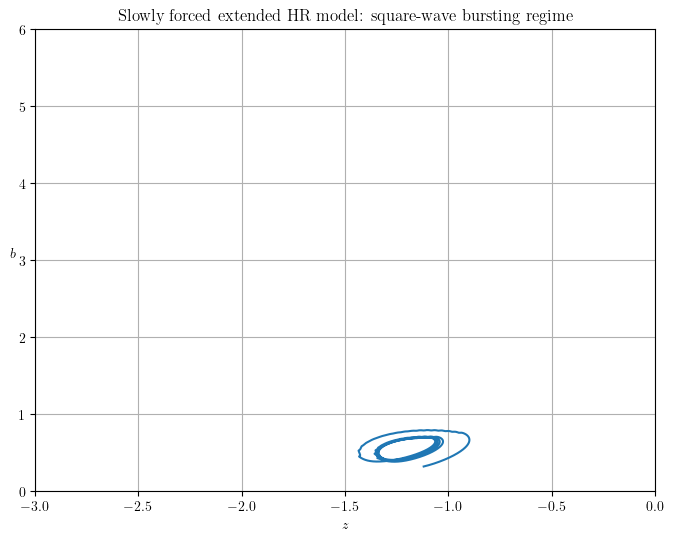

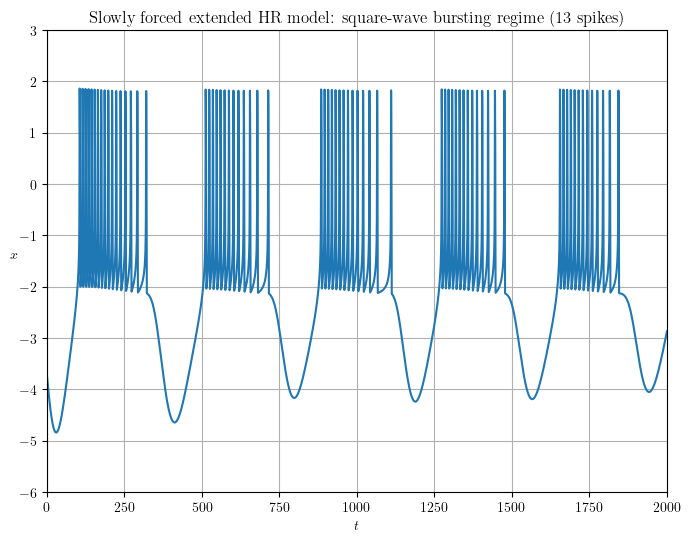

In [5]:
#------
# PLOT
#------
# Plot the solution 
plt.figure(figsize=(8, 6))
plt.plot(solSW.y[2],solSW.y[3])
# Add labels 
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced extended HR model: square-wave bursting regime')
plt.xlim([-3, 0])
plt.ylim([ 0, 6])
plt.grid()
plt.show()
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(8, 6))
plt.plot(solSW.t,solSW.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced extended HR model: square-wave bursting regime (13 spikes)')
plt.xlim([0, 2000])
plt.ylim([ -6, 3])
plt.grid()
plt.show()

### Simulation of square-wave (SW) bursting: 13 spikes (match data)

In [6]:
s1, x1, alpha, z0, b0 = 0.1, -3.0, -0.1, -0.7533, 0.57
ini_cond1bis = np.array([-3.71,14.27,-1.12,0.33])
# Simulate the extended HR model in the SW regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solSW = solve_ivp(HRext,t_span,ini_cond1bis,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

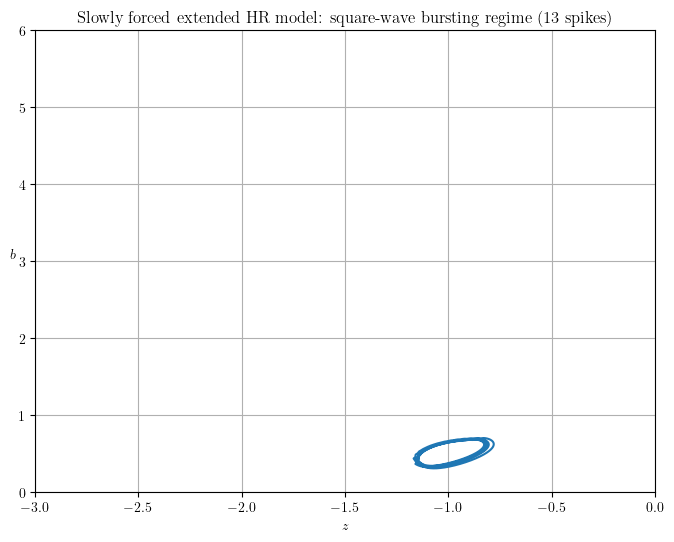

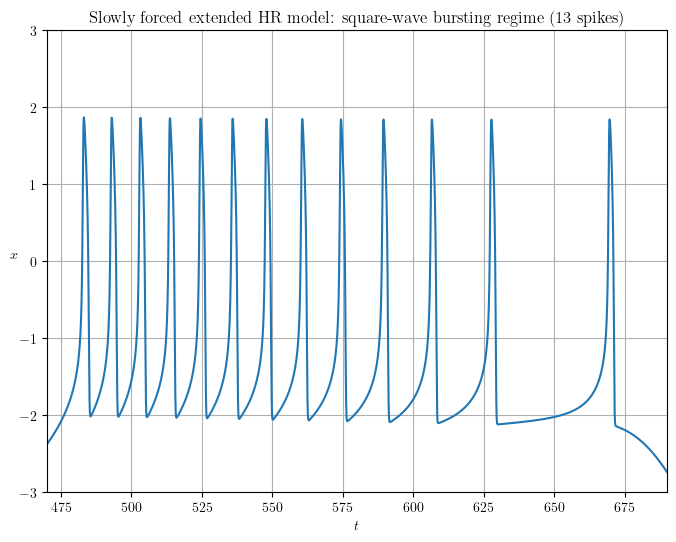

In [7]:
#------
# PLOT
#------
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(8, 6))
plt.plot(solSW.y[2],solSW.y[3])
# Add labels 
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced extended HR model: square-wave bursting regime (13 spikes)')
plt.xlim([-3, 0])
plt.ylim([ 0, 6])
plt.grid()
plt.show()
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(8, 6))
plt.plot(solSW.t,solSW.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced extended HR model: square-wave bursting regime (13 spikes)')
plt.xlim([470, 690])
plt.ylim([ -3, 3])
plt.grid()
plt.show()

### Simulation of parabolic (PARB) bursting

In [8]:
s1, alpha, z0, b0 = 0.01, -0.08, -1.7, 1.5
# Simulate the forced HR model in the PARB regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solP = solve_ivp(HRext,t_span,ini_cond2,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

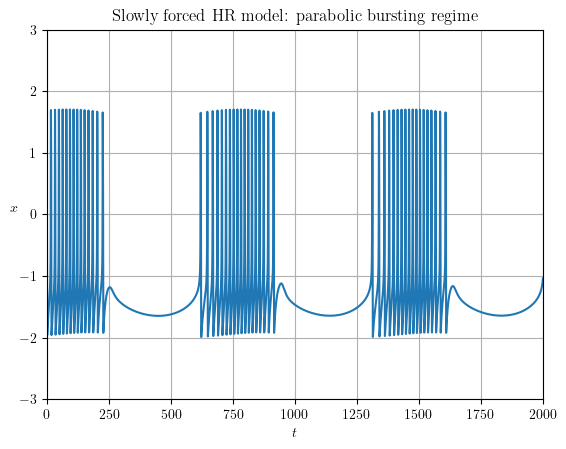

In [9]:
#------
# PLOT
#------
# Plot the solution 
plt.plot(solP.t,solP.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR model: parabolic bursting regime')
plt.xlim([0, 2000])
plt.ylim([-3, 3])
plt.grid()
plt.show()

### Simulation of parabolic bursting: 2 spikes (match data)

In [10]:
s1, x1, alpha, z0, b0 = 0.01, -3.0, -0.1, -1.7737, 1.5
ini_cond2bis = np.array([-1.81,0.07,-1.97,1.369])
# Simulate the forced HR model in the PARB regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solP = solve_ivp(HRext,t_span,ini_cond2bis,args=(s1, alpha, z0, b0,),t_eval=t_eval,rtol=1e-10)

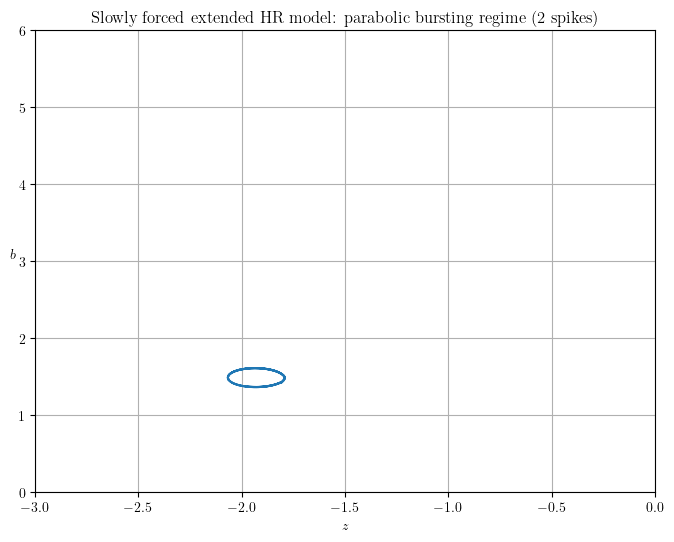

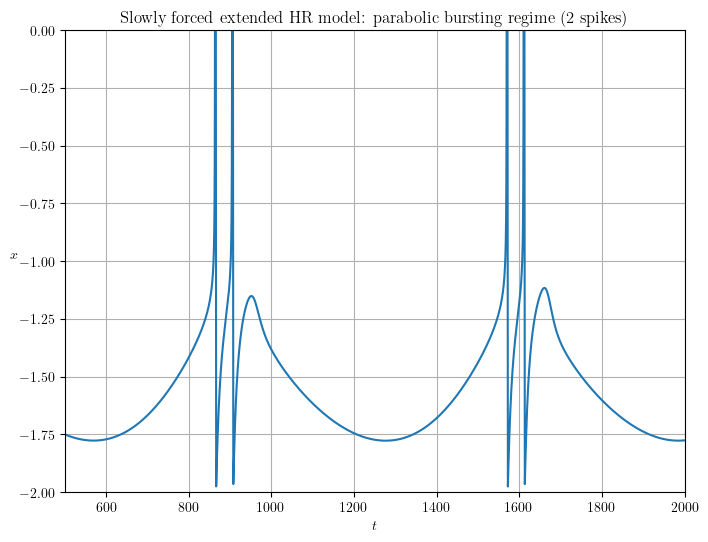

In [11]:
#------
# PLOT
#------
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(8, 6))
plt.plot(solP.y[2],solP.y[3])
# Add labels 
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced extended HR model: parabolic bursting regime (2 spikes)')
plt.xlim([-3, 0])
plt.ylim([ 0, 6])
plt.grid()
plt.show()
# Plot the solution in projection onto the (z,b) plane 
plt.figure(figsize=(8, 6))
plt.plot(solP.t,solP.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced extended HR model: parabolic bursting regime (2 spikes)')
plt.xlim([500, 2000])
plt.ylim([ -2, 0])
plt.grid()
plt.show()

### SDE simulation (Euler-Maruyama): square-wave bursting regime

In [23]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 0.75
sigma_b = 0.75
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0 
s1, x1, alpha, z0, b0 = 0.1, -3.0, -0.1, -0.7533, 0.57


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_b = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_b = sqrt_d_t*sigma_b
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_b = np.random.normal(0., std_dev_b, nb_time_steps)

# --- initialization
t, x, y, z, b = 0, -3.71, 14.27, -1.12, 0.33

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_b[0] = b

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z+I) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = eps*(-s1*(x-x1)-(b-b0))
    dot_b = eps*(z-z0+alpha*x) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z +eps*noise_b[k]
    b   += d_t*dot_b +eps*noise_z[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_b[k] = b
    


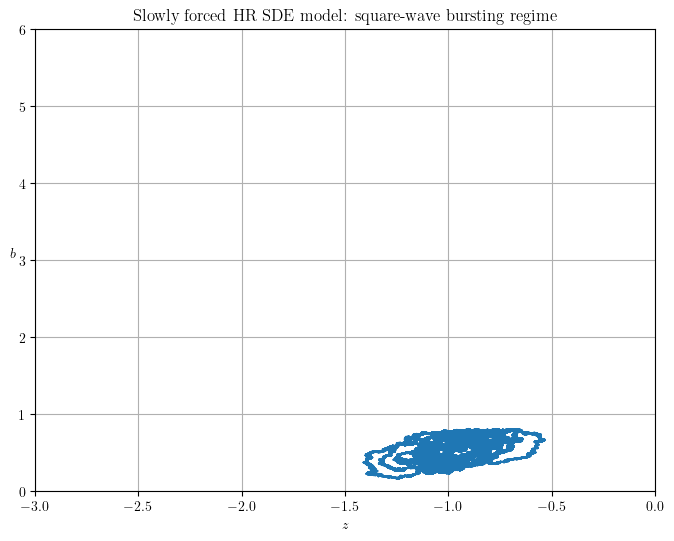

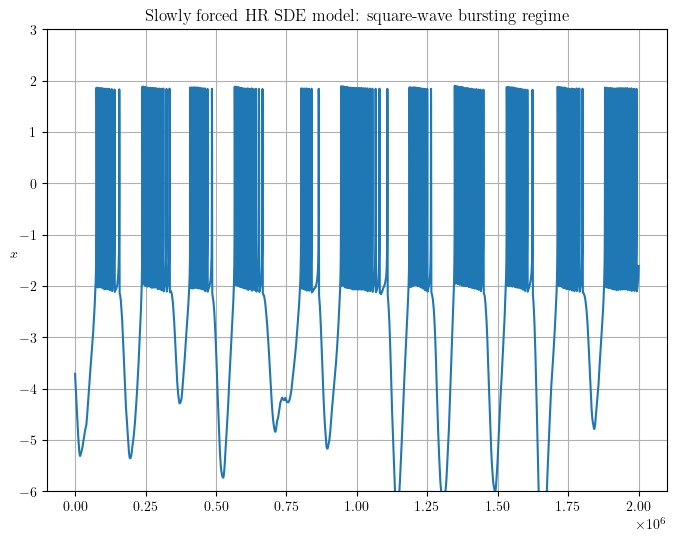

In [24]:
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_b)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.xlim([-3, 0])
plt.ylim([0, 6])
plt.grid()
plt.show()
#
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.ylim([-6, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)

### SDE simulation (Euler-Maruyama): parabolic bursting regime

In [25]:
t_max = 2000
nb_time_steps = 1000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 0.75
sigma_b = 0.75
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0
s1, x1, alpha, z0, b0 = 0.01, -3.0, -0.1, -1.7737, 1.5

# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_b = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_b = sqrt_d_t*sigma_b
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_b = np.random.normal(0., std_dev_b, nb_time_steps)

# --- initialization
t, x, y, z, b = 0, -1.81, 0.07, -1.97, 1.369

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_b[0] = b

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z+I) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = eps*(-s1*(x-x1)-(b-b0))
    dot_b = eps*(z-z0+alpha*x) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z +eps*noise_b[k]
    b   += d_t*dot_b +eps*noise_z[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_b[k] = b
    


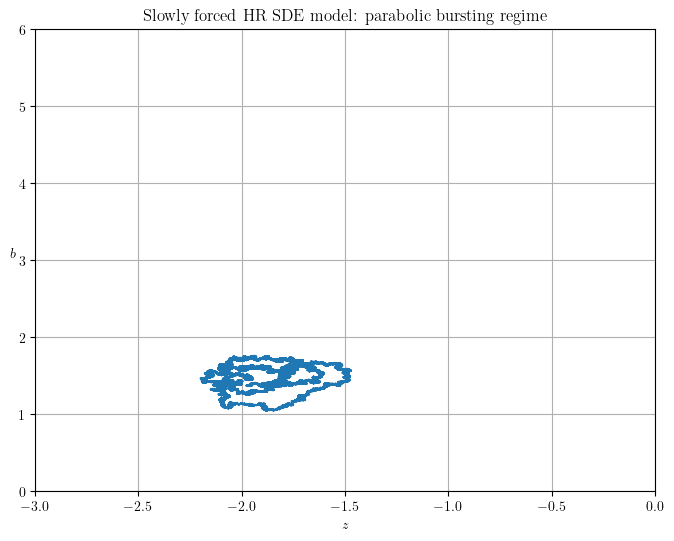

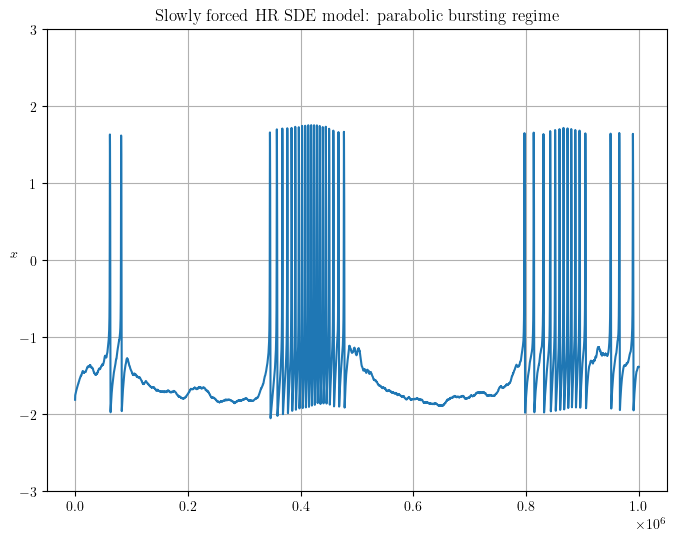

In [26]:
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_b)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.xlim([-3, 0])
plt.ylim([ 0, 6])
plt.grid()
plt.show()
#
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()


### SDE simulation (Euler-Maruyama) with OU process: square-wave bursting regime

In [27]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_u1 = 1.25
sigma_u2 = 1.25
gamma = 1.5
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0 
s1, x1, alpha, z0, b0 = 0.1, -3.0, -0.1, -0.7533, 0.57


# --- memory allocation
solution_sde_x  = np.zeros(nb_time_steps)
solution_sde_y  = np.zeros(nb_time_steps)
solution_sde_z  = np.zeros(nb_time_steps)
solution_sde_b  = np.zeros(nb_time_steps)
solution_sde_u1 = np.zeros(nb_time_steps)
solution_sde_u2 = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_u1 = sqrt_d_t*sigma_u1
std_dev_u2 = sqrt_d_t*sigma_u2
np.random.seed(42)
noise_u1 = np.random.normal(0., std_dev_u1, nb_time_steps)
noise_u2 = np.random.normal(0., std_dev_u2, nb_time_steps)

# --- initialization
t, x, y, z, b, u1, u2 = 0, -3.71, 14.27, -1.12, 0.33, 0.2, 0.2

solution_sde_x[0]  = x
solution_sde_y[0]  = y
solution_sde_z[0]  = z
solution_sde_b[0]  = b
solution_sde_u1[0] = u1
solution_sde_u2[0] = u2

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x  = c*(x-x**3/3-y+z+I) 
    dot_y  = (x**2+d*x-b*y+a)/c
    dot_z  = eps*(-s1*(x-x1)-(b-b0)+u1)
    dot_b  = eps*(z-z0+alpha*x+u2) 
    dot_u1 =  -gamma*u1
    dot_u2 =  -gamma*u2
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z
    b   += d_t*dot_b 
    u1  += d_t*dot_u1 + noise_u1[k]
    u2  += d_t*dot_u2 + noise_u2[k]
    solution_sde_x[k]  = x
    solution_sde_y[k]  = y
    solution_sde_z[k]  = z
    solution_sde_b[k]  = b
    solution_sde_u1[k] = u1
    solution_sde_u2[k] = u2
    

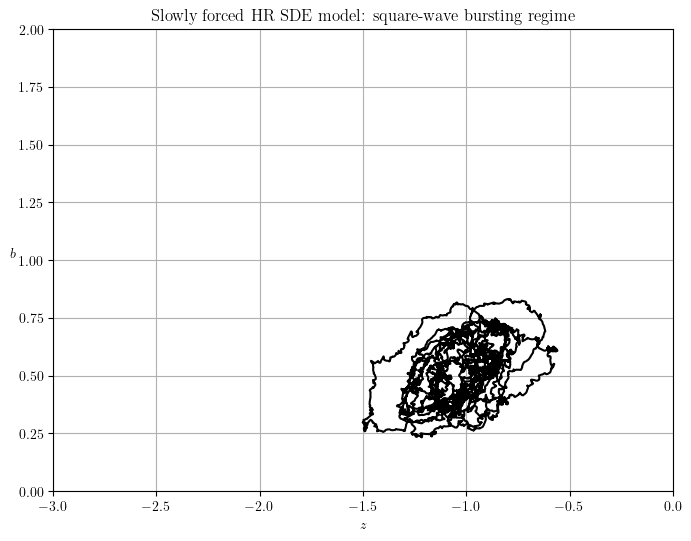

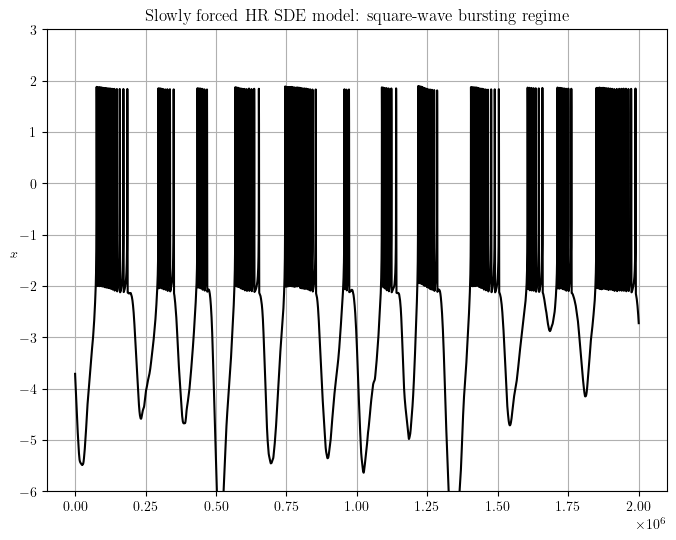

In [28]:
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_b,'k')
# Add labels
plt.xlabel('$z$',rotation=0)
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.xlim([-3,0])
plt.ylim([0, 2])
plt.grid()
plt.show()
#
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,'k')
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.ylim([-6, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)

### SDE simulation (Euler-Maruyama) with OU process: parabolic bursting regime

In [29]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_u1 = 0.5
sigma_u2 = 0.5
gamma = 1.5
sqrt_d_t = np.sqrt(d_t)
# fix s1, x1, alpha, z0, b0
s1, x1, alpha, z0, b0 = 0.01, -3.0, -0.1, -1.7737, 1.5


# --- memory allocation
solution_sde_x  = np.zeros(nb_time_steps)
solution_sde_y  = np.zeros(nb_time_steps)
solution_sde_z  = np.zeros(nb_time_steps)
solution_sde_b  = np.zeros(nb_time_steps)
solution_sde_u1 = np.zeros(nb_time_steps)
solution_sde_u2 = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_u1 = sqrt_d_t*sigma_u1
std_dev_u2 = sqrt_d_t*sigma_u2
np.random.seed(42)
noise_u1 = np.random.normal(0., std_dev_u1, nb_time_steps)
noise_u2 = np.random.normal(0., std_dev_u2, nb_time_steps)

# --- initialization
t, x, y, z, b, u1, u2 = 0, -1.81, 0.07, -1.97, 1.369, 0.2, 0.2

solution_sde_x[0]  = x
solution_sde_y[0]  = y
solution_sde_z[0]  = z
solution_sde_b[0]  = b
solution_sde_u1[0] = u1
solution_sde_u2[0] = u2

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z+I) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z  = eps*(-s1*(x-x1)-(b-b0)+u1)
    dot_b  = eps*(z-z0+alpha*x+u2) 
    dot_u1 =  -gamma*u1
    dot_u2 =  -gamma*u2
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z
    b   += d_t*dot_b
    u1  += d_t*dot_u1 + noise_u1[k]
    u2  += d_t*dot_u2 + noise_u2[k]
    solution_sde_x[k]  = x
    solution_sde_y[k]  = y
    solution_sde_z[k]  = z
    solution_sde_b[k]  = b
    solution_sde_u1[k] = u1
    solution_sde_u2[k] = u2


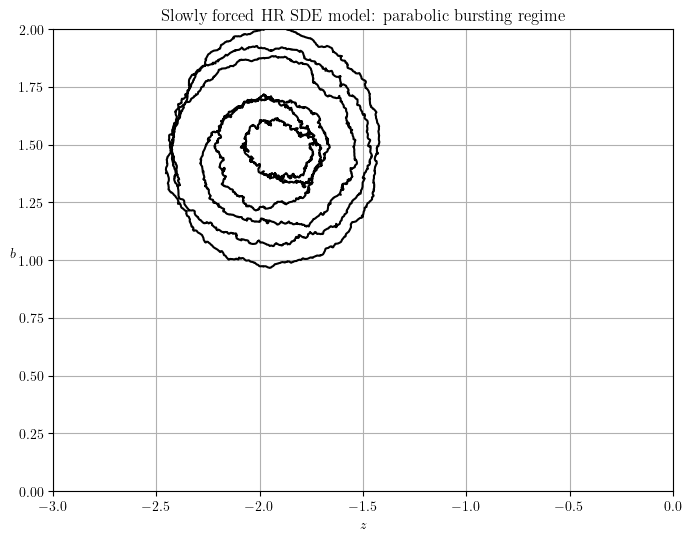

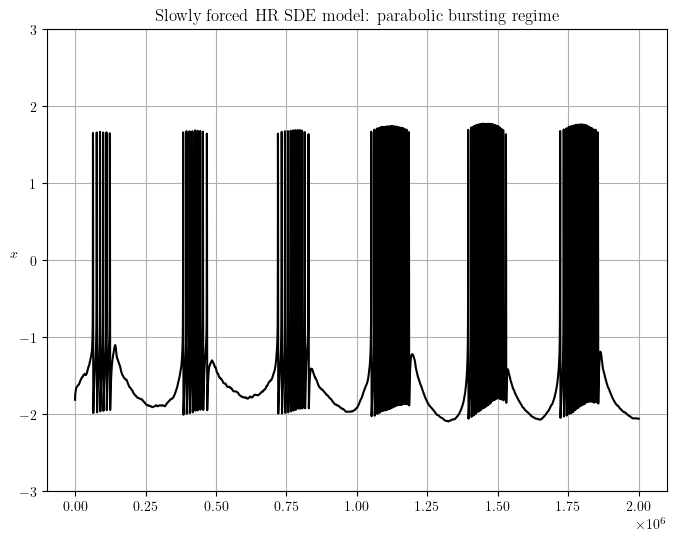

In [30]:
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_b,'k')
# Add labels
plt.xlabel('$z$',rotation=0)
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.xlim([-3, 0])
plt.ylim([0, 2])
plt.grid()
plt.show()
#
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,'k')
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)

### SDE simulation (Euler-Maruyama) with OU process: mixed regime

In [31]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_u1 = 1.25
sigma_u2 = 1.25
gamma = 1.5
sqrt_d_t = np.sqrt(d_t)
cc = 1/c
# fix s1, x1, alpha, z0, b0
s1, x1, alpha, z0, b0 = 0.01, -3.0, -0.1, -1.55, 0.9


# --- memory allocation
solution_sde_x  = np.zeros(nb_time_steps)
solution_sde_y  = np.zeros(nb_time_steps)
solution_sde_z  = np.zeros(nb_time_steps)
solution_sde_b  = np.zeros(nb_time_steps)
solution_sde_u1 = np.zeros(nb_time_steps)
solution_sde_u2 = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_u1 = sqrt_d_t*sigma_u1
std_dev_u2 = sqrt_d_t*sigma_u2
np.random.seed(42)
noise_u1 = np.random.normal(0., std_dev_u1, nb_time_steps)
noise_u2 = np.random.normal(0., std_dev_u2, nb_time_steps)

# --- initialization
t, x, y, z, b, u1, u2 = 0, -1.81, 0.07, -1.5, 0.8, 0.2, 0.2

solution_sde_x[0]  = x
solution_sde_y[0]  = y
solution_sde_z[0]  = z
solution_sde_b[0]  = b
solution_sde_u1[0] = u1
solution_sde_u2[0] = u2

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x*x*x/3-y+z+I) 
    dot_y = cc*(x*x+d*x-b*y+a)
    dot_z  = eps*(-s1*(x-x1)-(b-b0)+u1)
    dot_b  = eps*(z-z0+alpha*x+u2) 
    dot_u1 =  -gamma*u1
    dot_u2 =  -gamma*u2
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z
    b   += d_t*dot_b
    u1  += d_t*dot_u1 + noise_u1[k]
    u2  += d_t*dot_u2 + noise_u2[k]
    solution_sde_x[k]  = x
    solution_sde_y[k]  = y
    solution_sde_z[k]  = z
    solution_sde_b[k]  = b
    solution_sde_u1[k] = u1
    solution_sde_u2[k] = u2

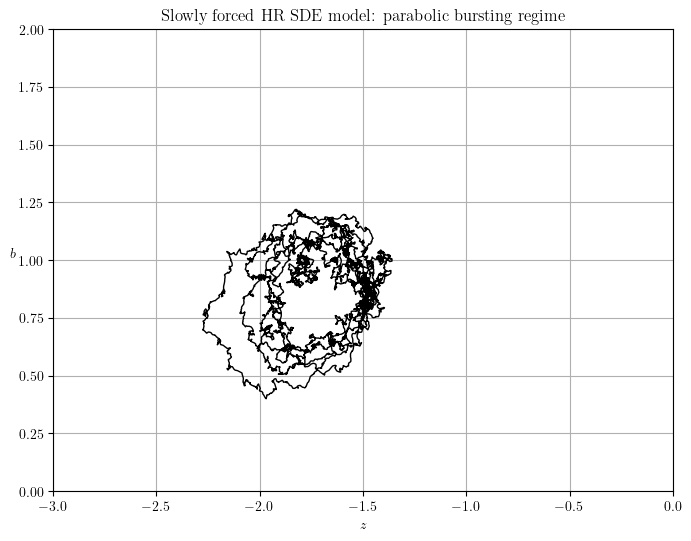

<Figure size 640x480 with 0 Axes>

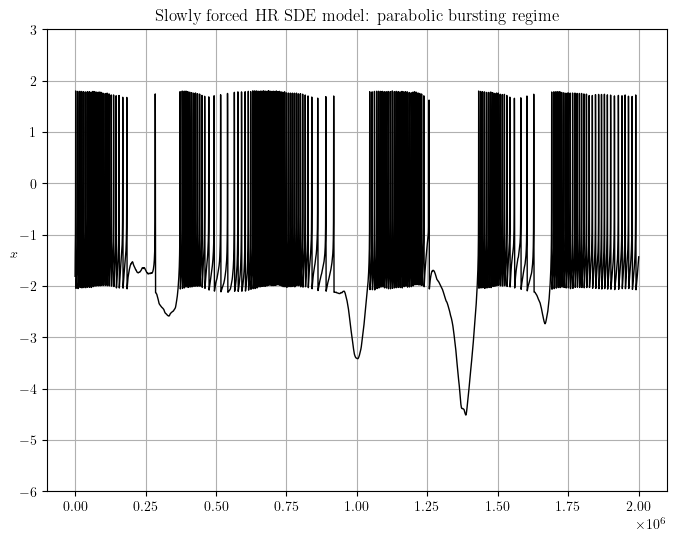

<Figure size 640x480 with 0 Axes>

In [32]:
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_b,'k',linewidth=1)
# Add labels
plt.xlabel('$z$',rotation=0)
plt.ylabel('$b$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.xlim([-3, 0])
plt.ylim([0, 2])
plt.grid()
plt.show()
plt.savefig('MixedBursting_zb.png', dpi=300)
#
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,'k',linewidth=1)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.ylim([-6, 3])
plt.grid()
plt.show()
plt.savefig('MixedBursting_xtime.png', dpi=300)